In [112]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')  
os.chdir("/content/drive/My Drive/Colab Notebooks/SPICES DATSET")
sys.path.append("/content/drive/My Drive/Colab Notebooks/SPICES DATSET")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [114]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [115]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [118]:
#model selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import LabelEncoder

In [119]:

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

In [120]:

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense

In [122]:
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


In [125]:
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

import random as rn

In [126]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [127]:
#dataset of image
train_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Train'
test_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test'
val_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/val'

In [128]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/SPICES DATSET/Train"
categories = os.listdir(path) 
categories

['VANILLA', 'Cardamom', 'PEPPER', 'Clove', 'Ginger', 'STAR ANISE', 'Turmeric']

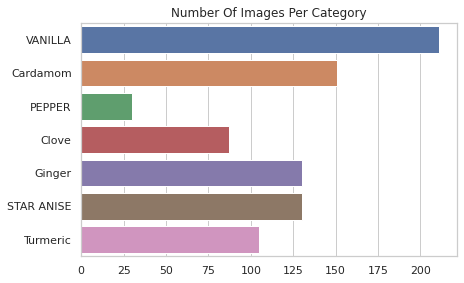

In [129]:
import seaborn as sns
category_names = os.listdir(path)
nb_categories = len(categories) 
train_images = []

for category in categories:
    folder = path + "/" + category
    train_images.append(len(os.listdir(folder)))   
    
sns.barplot(y=category_names, x=train_images).set_title("Number Of Images Per Category");

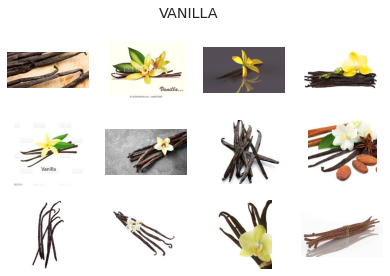

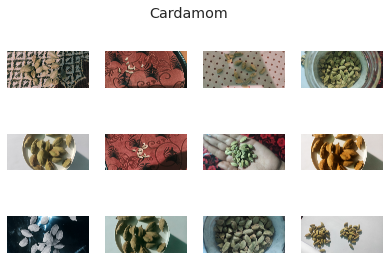

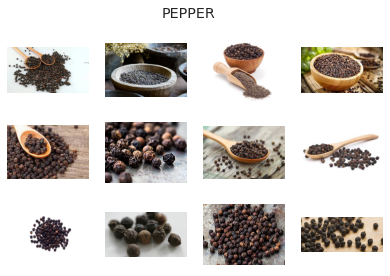

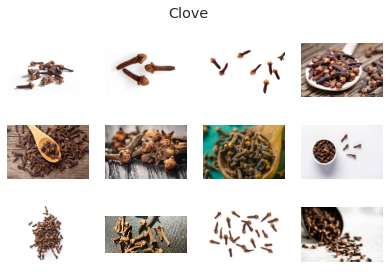

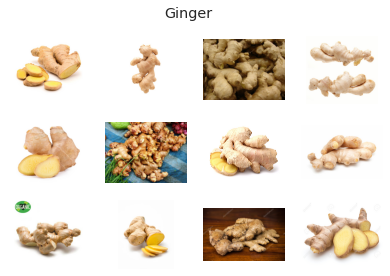

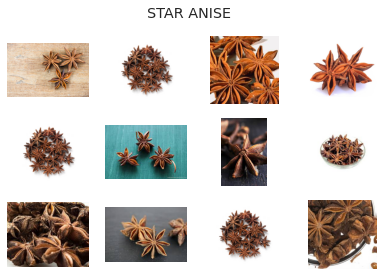

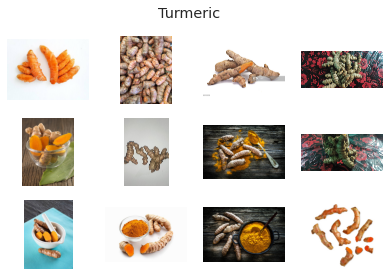

In [50]:
import matplotlib.pyplot as plt
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+'/'+category)[:12]):
        img = plt.imread(path+'/'+category+'/'+v)
        plt.subplot(3, 4 , k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [129]:
# import tensorflow as tf    
# tf.random.set_seed(42)

In [129]:
# np.random.seed(42)
# rn.seed(42)
# tf.random.set_seed(42)

In [130]:
#define a CNN model called AlexNet
#with 5 Convolutional layers and 3 Fully Connected Layers(Final layer is softmax)
image_shape = (150, 150, 3)

In [130]:
# np.random.seed(1000) #Instantiate an empty model

In [131]:
#Instantiation
from keras.models import Sequential
model = Sequential() #it starts here #it starts here

In [132]:
#batch_size=16
# epochs=20

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [133]:
import keras
from tensorflow.python.keras.models import Input
# from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import ELU, PReLU, LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 35, 35, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 35, 35, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 17, 17, 256)      1024      
 chNormalization)                                                
                                                      

In [134]:
#compiling the model using adam optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [135]:
#data augmentation
#train test spliting
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 842 images belonging to 7 classes.
Found 114 images belonging to 7 classes.


In [136]:
print(len(training_set))
print(len(test_set))

27
4


In [137]:
# #Fitting on the Training set and making predcitons on the Validation set
# History = model.fit_generator (datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_test,y_test),
#                              verbose =1, steps_per_epoch=(x_train.shape[0] // batch_size))
# #model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=120,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/120
27/27 [==============================] - 77s 3s/step - loss: 10.1458 - accuracy: 0.3029 - val_loss: 234.3786 - val_accuracy: 0.1842
Epoch 2/120
27/27 [==============================] - 74s 3s/step - loss: 4.6962 - accuracy: 0.3812 - val_loss: 52.8275 - val_accuracy: 0.1053
Epoch 3/120
27/27 [==============================] - 72s 3s/step - loss: 3.0460 - accuracy: 0.4418 - val_loss: 62.5633 - val_accuracy: 0.1140
Epoch 4/120
27/27 [==============================] - 72s 3s/step - loss: 2.3044 - accuracy: 0.4608 - val_loss: 39.4277 - val_accuracy: 0.1579
Epoch 5/120
27/27 [==============================] - 74s 3s/step - loss: 1.8210 - accuracy: 0.5154 - val_loss: 17.4809 - val_accuracy: 0.2281
Epoch 6/120
27/27 [==============================] - 72s 3s/step - loss: 1.4390 - accuracy: 0.5713 - val_loss: 5.0245 - val_accuracy: 0.3158
Epoch 7/120
27/27 [==============================] - 74s 3s/step - loss: 1.2832 - accuracy: 0.5998 - val_loss: 2.2917 - val_accuracy: 0.3684
Epoch 

In [138]:
print(r.history.keys())
#Calculating Accuracy of Model Achieved on Test set
print('Test set Accuracy: {} %'.format(r.history['val_accuracy'][-1]*100))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Test set Accuracy: 96.49122953414917 %


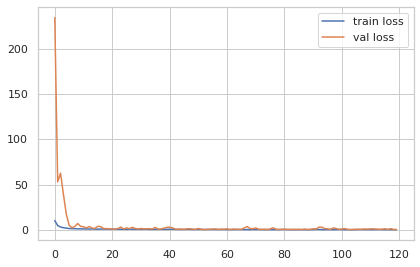

In [139]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

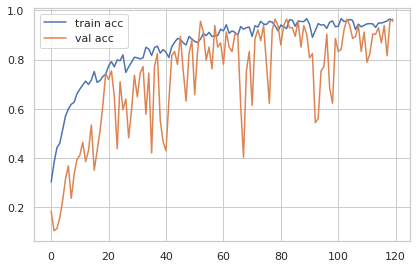

In [140]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [152]:
#save the model
model.save('/content/drive/My Drive/Colab Notebooks/SPICES DATSET/SP.h5')

In [153]:

import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.9.2
2.9.0


In [155]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


model1 = load_model('SP.h5',compile=False)  

In [156]:
#labeling as key value pair 
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [157]:
print(training_set.class_indices)

{'Cardamom': 0, 'Clove': 1, 'Ginger': 2, 'PEPPER': 3, 'STAR ANISE': 4, 'Turmeric': 5, 'VANILLA': 6}


In [158]:
#out put fuction
def output(location):
    img=load_img(location,target_size=(150,150,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 147ms/step


'PEPPER'

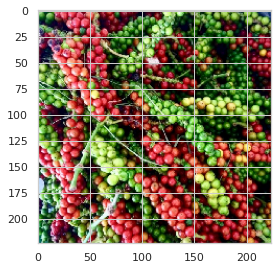

In [161]:
img='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test/PEPPER/WhatsApp Image 2022-11-05 at 9.49.10 PM (1).jpeg'
pic=load_img('/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test/PEPPER/WhatsApp Image 2022-11-05 at 9.49.10 PM (1).jpeg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [150]:
from google.colab import files#used to load data on google colab
uploaded =files.upload()

Saving p101.jpg to p101 (1).jpg


1/1 [==============================] - 0s 101ms/step


'PEPPER'

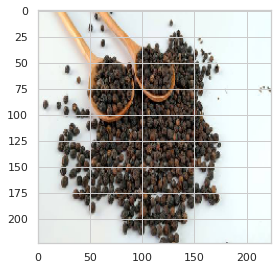

In [151]:
img='p101.jpg'
pic=load_img('p101.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)